# <center> Algorithms Project

# Image segmentation (using kmeans)


## Team members
>- Osama Ayman 
>- Randa Hesham

In [245]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import cv2
from scipy.spatial import distance as ds

In [246]:
class KMeans:
  def __init__(self,n_clusters=2,max_iters=10, tol=1):
    self.iteration=max_iters
    self.k=n_clusters
    self.tol=tol
    self.clusters={i:[] for i in range(self.k)}
    self.centroids=[]


  def predict(self,x):
    self.X=x
    self.n_pixels,self.n_features=x.shape

    #choice random k pixels to be centroids
    self.centroids=self.X[np.random.choice(self.n_pixels,self.k,replace=False)]

    while self.iteration>0:
      
      self._get_clusters()
      old_centers=self.centroids.copy()
      self._calc_centroid()
     
      if self._converged(old_centers):
        print('converged')
        break
      
      self.iteration-=1

    return self._get_labels()


  def _get_clusters(self):
    self.clusters={i:[] for i in range(self.k)}
    for idx,pixel in enumerate(self.X):
      center=self._closest_center(pixel)
      self.clusters[center].append(idx)



  def _closest_center(self,pixel):
    distances=[ds.euclidean(pixel,center) for center in self.centroids]
    # return index of minumum distance
    return np.argmin(distances)
  


  def _calc_centroid(self):
    for cluster_id,cluster in self.clusters.items():
      mean_center=np.mean(self.X[cluster],axis=0)
      self.centroids[cluster_id]=mean_center



  def _converged(self,old_centers):
    diff=[ds.euclidean(self.centroids[i],old_centers[i]) for i in range(self.k)]
    return sum(diff)<=self.tol

  def _get_labels(self):
    labels=np.empty(self.n_pixels,dtype=int)
    for cluster_id,cluster in self.clusters.items():
      for pixel in cluster:
        labels[pixel]=cluster_id

    return labels

  def centers(self):
    return self.centroids

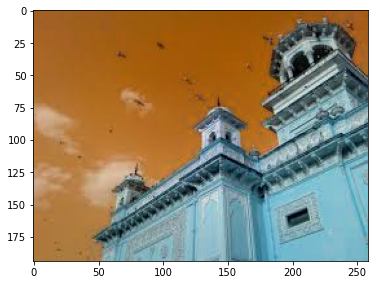

In [247]:
image = cv2.imread("image2.png")
plt.figure(figsize=(6, 6))
plt.imshow(image)

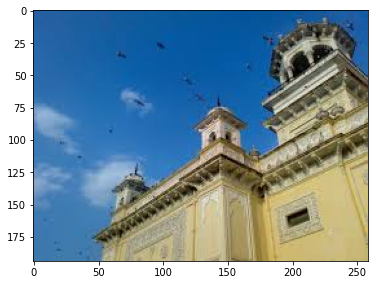

In [248]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [249]:
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

In [250]:
kmean = KMeans(n_clusters=3, max_iters=50)  
labels = kmean.predict(pixels) 

converged


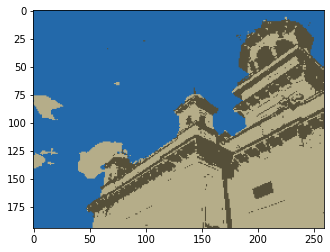

In [251]:
centers = np.uint8(kmean.centers())
segmented_image2 = centers[labels]
segmented_image2 = segmented_image2.reshape(image.shape)
plt.imshow(segmented_image2)
plt.show()

## We can use this algorithm in background subtraction app 

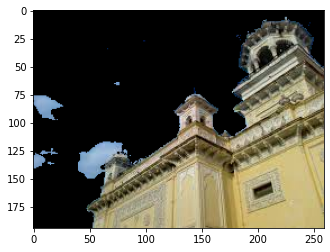

In [254]:
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1, 3))
cluster = [2]
masked_image[labels==cluster] = [0, 0, 0]
masked_image = masked_image.reshape(image.shape)
plt.imshow(masked_image)
plt.show()